PROJCS["S-JTSK_Krovak_East_North",GEOGCS["GCS_S_JTSK",DATUM["System_Jednotne_Trigonometricke_Site_Katastralni",SPHEROID["Bessel_1841",6377397.155,299.1528128]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Krovak"],PARAMETER["False_Easting",0.0],PARAMETER["False_Northing",0.0],PARAMETER["Pseudo_Standard_Parallel_1",78.5],PARAMETER["Scale_Factor",0.9999],PARAMETER["Azimuth",30.28813975277778],PARAMETER["Longitude_Of_Center",24.83333333333333],PARAMETER["Latitude_Of_Center",49.5],PARAMETER["X_Scale",-1.0],PARAMETER["Y_Scale",1.0],PARAMETER["XY_Plane_Rotation",90.0],UNIT["Meter",1.0]]
          DOW   FACC  IDN2              NM2        VYMERA     Shape_Leng  \
0  2020-03-01  FA002     1     Bratislavský  2.052613e+09  292937.729762   
1  2020-03-01  FA002     2         Trnavský  4.146299e+09  555291.991973   
2  2020-03-01  FA002     3      Trenčiansky  4.501806e+09  459818.499529   
3  2020-03-01  FA002     4       Nitriansky  6.343731e+09  544854.626118   
4  202

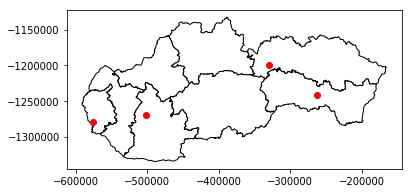

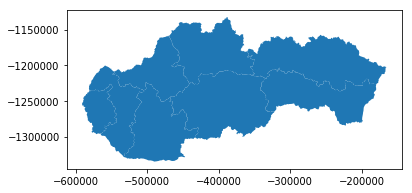

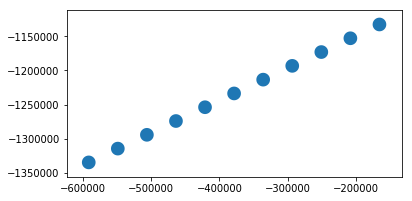

In [34]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from geopandas.tools import overlay

mapa_slovensko = gpd.read_file('zip://./inputs/ah_shp_3.zip')
b = [int(x) for x in mapa_slovensko.total_bounds]
N = 10
body = gpd.GeoDataFrame([
    {'geometry': Point(x, y).buffer(10000), 'value1': x + y, 'value2': x - y}
    for x, y in zip(range(b[0], b[2], int((b[2] - b[0]) / N)),
                    range(b[1], b[3], int((b[3] - b[1]) / N)))
])

df = pd.DataFrame(
    {'City': ['Bratislava', 'Kosice', 'Nitra', 'Poprad'],
     'Latitude': [48.152455, 48.705940, 48.301065, 49.053584, ],
     'Longitude': [17.073918, 21.262532, 18.069078, 20.318389]})

gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf.crs = "EPSG:4326"
gdf = gdf.to_crs(mapa_slovensko.crs)

ax = mapa_slovensko.plot(
    color='white', edgecolor='black')


gdf.plot(ax=ax, color='red')
mapa_slovensko.plot()
body.plot()
print(mapa_slovensko.crs)
print(mapa_slovensko)